# Акулова Анастасия ИУ5-65Б 
# Сердечная недостаточность

# Описание набора данных

В качестве набора данных используется датасет [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)
Для решения задачи классификации был выбран набор данных содержащий информацию о пациентах, которые могут быть подвержены сердечной недостаточности. 

Датасет состоит из одного файла heart.csv

В наборе данных присутствуют следующие столбцы:
*   Age: возраст пациента [годы]
*   Sex: пол пациента [M: мужчина, F: Женщина]
*   ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP:неангинальная боль, ASY: бессимптомная]
*   RestingBP: кровяное давление в состоянии покоя [мм рт. ст.]
*   Cholesterol: сывороточный холестерин [мм / дл]
*   FastingBS: Уровень сахара в крови натощак : 1 если уровень сахара в крови натощак > 120 мг / дл, 0: в противном случае
*   RestingECG: результаты электрокардиограммы в состоянии покоя [Нормальный: нормальный, ST: аномалия зубца ST-T (инверсия зубца T и / или подъем или депрессия ST > 0,05 мВ), ГЛЖ: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]
*   LVH: достигнутая максимальная частота сердечных сокращений [Числовое значение от 60 до 202]
*   MaxHR: достигнутая максимальная частота сердечных сокращений [Числовое значение от 60 до 202]
*   ExerciseAngina: Стенокардия, вызванная физической нагрузкой [Y: Да, N: Нет]
*   Oldpeak: oldpeak = ST [Числовое значение, измеряемое при депрессии]
*   ST_Slope: наклон сегмента ST при максимальной нагрузке [Up: подъем, Flat: равнина, Down: спад]
*   HeartDisease: выходной класс [1: болезнь сердца, 0: норма]

Будем решать задачу классификации: определять есть ли у человека сердечная недостаточность

# Импорт библиотек и загрузка данных

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score

# Разведочный анализ данных, визуализация и предобработка данных

## Общая информация о датасете

In [202]:
data = pd.read_csv('heart.csv')
data = data.drop_duplicates()

In [203]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Размер датасета.

In [204]:
data.shape

(918, 12)

Список колонок датасета.

In [205]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Список колонок с типами данных.

In [206]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Проверка на наличие пропусков

In [207]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Пропусков нет

## Проверка на дубликаты

In [208]:
data.duplicated().sum()

0

Дубликатов нет

## Визуализация. Разведочный анализ данных

In [209]:
COLUMNS = data.columns
COLUMNS

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [210]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Очевидно, что HeartDisease будет целевым признаком. Заранее запомним числовые и категориальные признаки.

In [211]:
NUM_COLUMNS = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
CAT_COLUMNS = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
TARGET_KEY = 'HeartDisease'

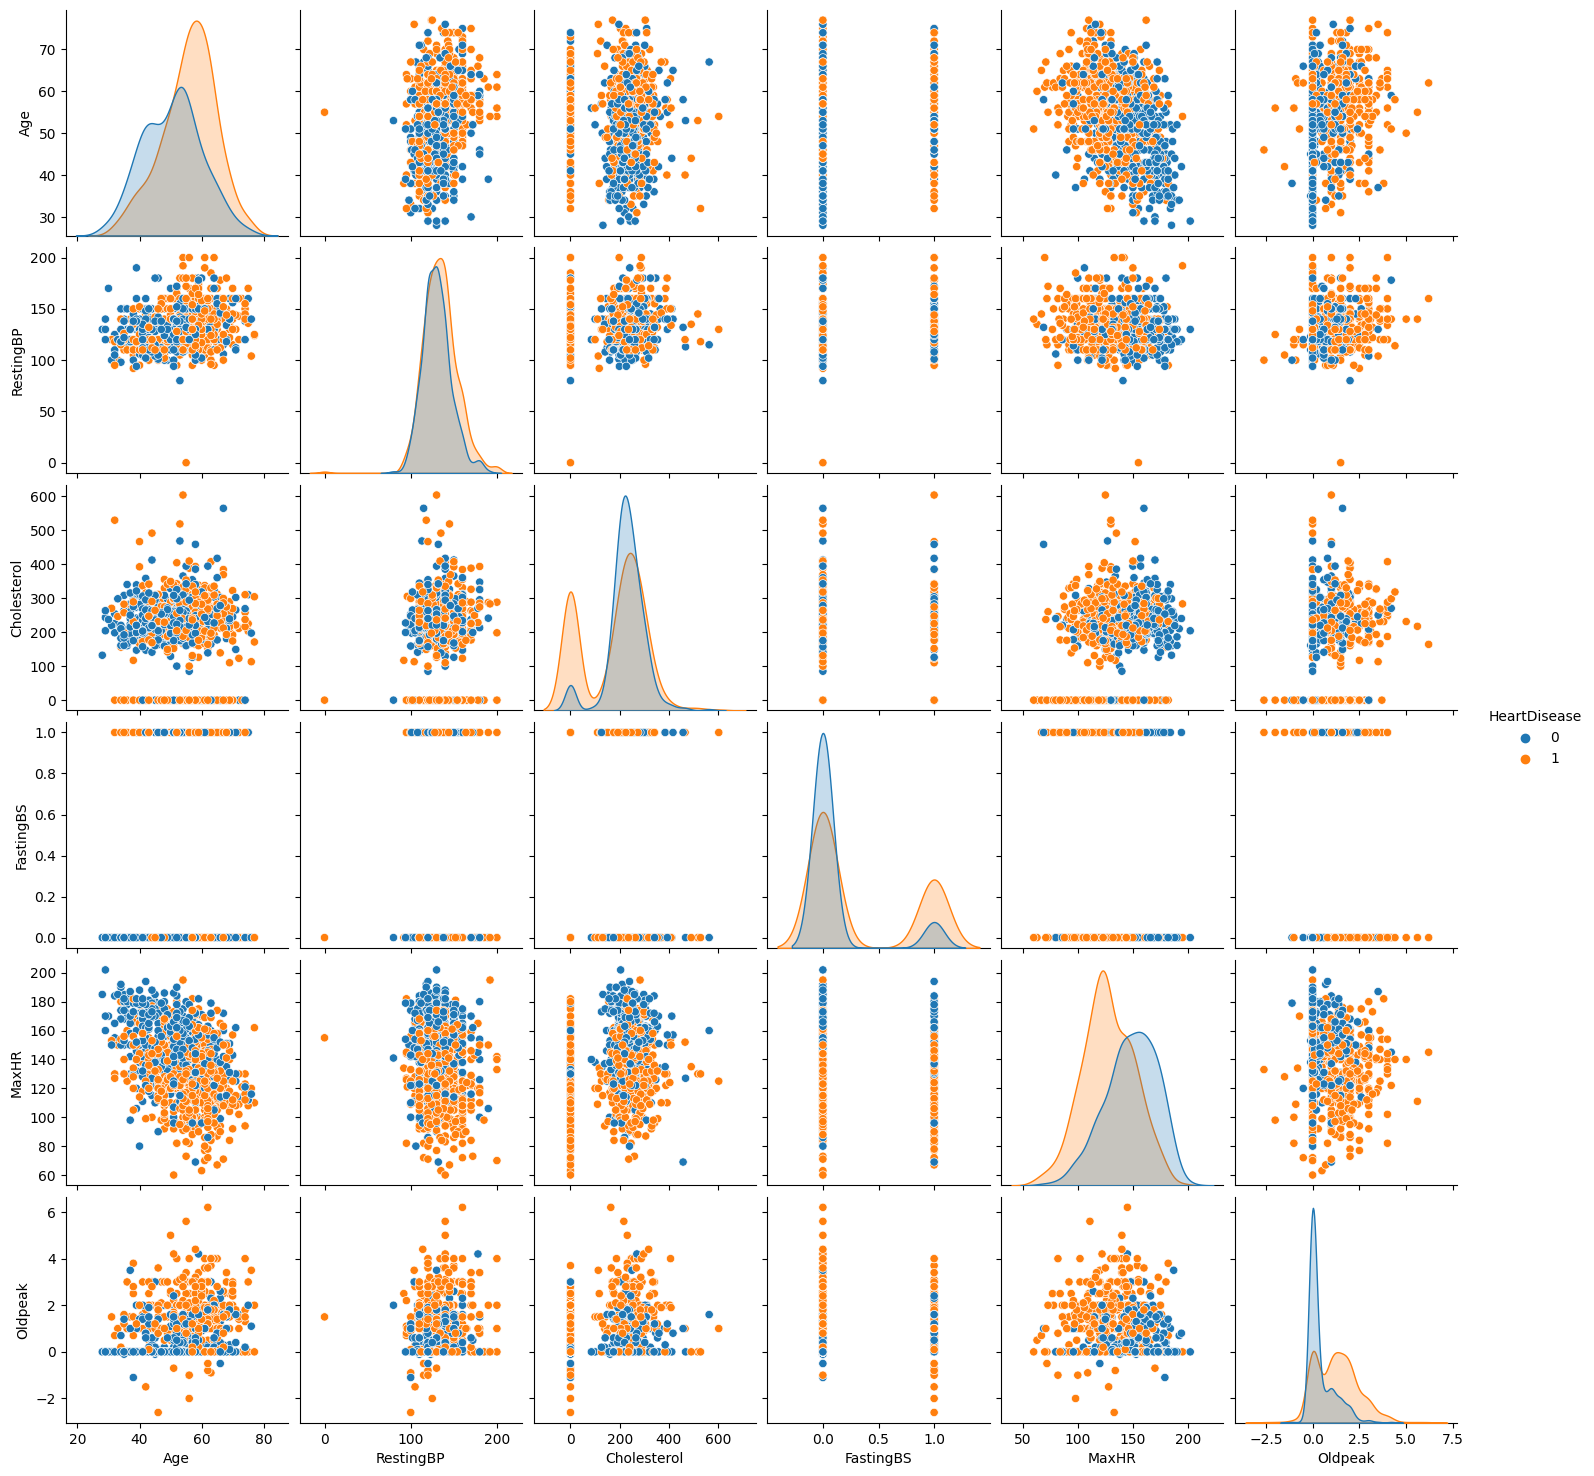

In [212]:
sns.pairplot(data, hue=TARGET_KEY)

In [213]:
data[TARGET_KEY].unique()

array([0, 1], dtype=int64)

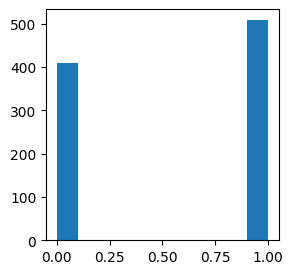

In [214]:
fig, ax = plt.subplots(figsize=(3, 3))
plt.hist(data[TARGET_KEY])
plt.show()

In [215]:
total = data.shape[0]
class_0, class_1 = data[TARGET_KEY].value_counts()
print(f'Класс 0: {round(class_0 / total * 100, 2)}%\nКласс 1: {round(class_1 / total * 100, 2)}%')

Класс 0: 55.34%
Класс 1: 44.66%


Классы в датасете сбалансированы

In [216]:
data.groupby(data.HeartDisease).mean()

C:\Users\miss-\AppData\Local\Temp\ipykernel_13536\3487762249.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data.HeartDisease).mean()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


Предположения на основании поиска среденего значения с группировкой по целевому признаку:
* для сердечной недостаточности характерно наличие высокого кровяного давления в состоянии покоя и сахара в крови, также низкого халестерина
* среди людей с сердечной недостаточностью чаще всего встречаются люди более взрослые
* среди людей с зафиксированное сердечной недостаточностью люди могут страдать депрессией
* у больных сердечной недостаточностью сердце частота сердечных сокращений реже

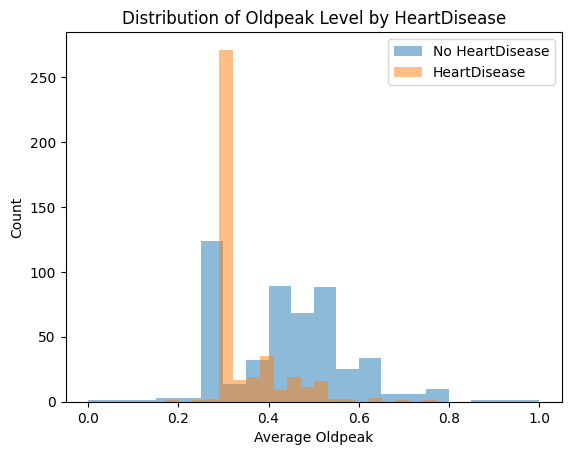

In [245]:


Oldpeak_stroke = data[data['HeartDisease'] == 1]['Oldpeak']
Oldpeak_no_stroke = data[data['HeartDisease'] == 0]['Oldpeak']

plt.hist(Oldpeak_stroke, bins=20, alpha=0.5, label='No HeartDisease')
plt.hist(Oldpeak_no_stroke, bins=20, alpha=0.5, label='HeartDisease')

plt.xlabel('Average Oldpeak')
plt.ylabel('Count')
plt.title('Distribution of Oldpeak Level by HeartDisease')

plt.legend()

plt.show()


Люди, у которых была обнаружена сердечная недостаточность, впадают в депрессию

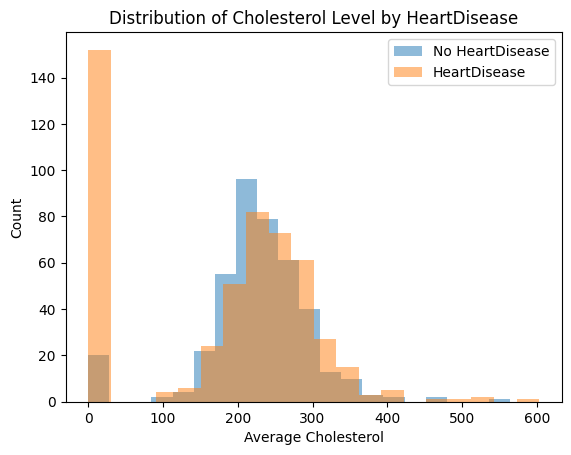

In [218]:
glucose_stroke = data[data['HeartDisease'] == 1]['Cholesterol']
glucose_no_stroke = data[data['HeartDisease'] == 0]['Cholesterol']

plt.hist(glucose_no_stroke, bins=20, alpha=0.5, label='No HeartDisease')
plt.hist(glucose_stroke, bins=20, alpha=0.5, label='HeartDisease')

plt.xlabel('Average Cholesterol')
plt.ylabel('Count')
plt.title('Distribution of Cholesterol Level by HeartDisease')

plt.legend()

plt.show()

Халестерин влияет на заболевание сердечной недостаточностью

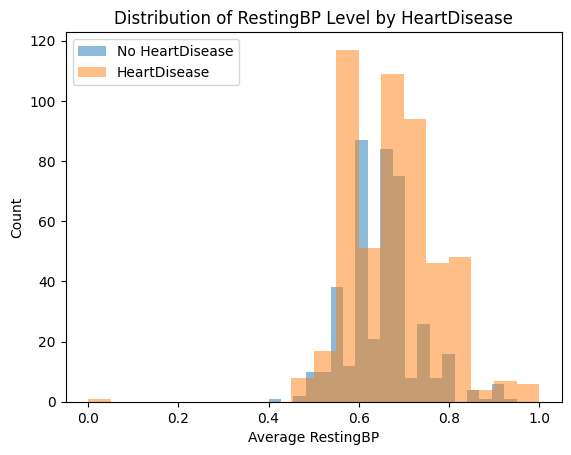

In [246]:

glucose_stroke = data[data['HeartDisease'] == 1]['RestingBP']
glucose_no_stroke = data[data['HeartDisease'] == 0]['RestingBP']

plt.hist(glucose_no_stroke, bins=20, alpha=0.5, label='No HeartDisease')
plt.hist(glucose_stroke, bins=20, alpha=0.5, label='HeartDisease')

plt.xlabel('Average RestingBP')
plt.ylabel('Count')
plt.title('Distribution of RestingBP Level by HeartDisease')

plt.legend()

plt.show()

Кровяное давление при сердечной недостаточности чуть выше

Text(0.5, 1.0, 'Stroke by heart FastingBS')

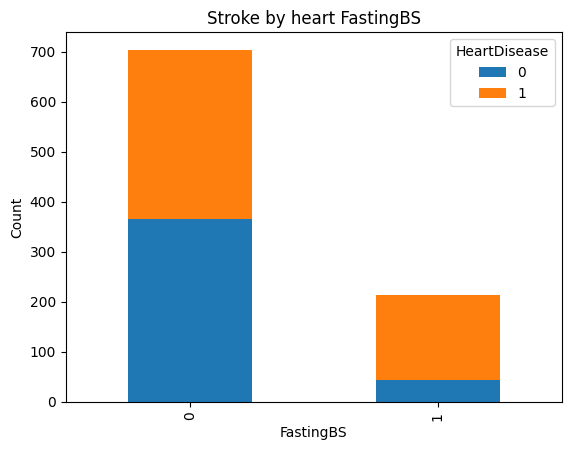

In [220]:
counts = data.groupby(['FastingBS', 'HeartDisease'])['HeartDisease'].count().unstack()

# totals = counts.sum(axis=1)
# percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)
# ax.set_ylim([0,100])
plt.xlabel('FastingBS')
plt.ylabel('Count')
plt.title('Stroke by heart FastingBS')

У людей с сердечной недостаточностью сильно больше уровень сахара в крови

Text(0.5, 1.0, 'Stroke by heart Sex')

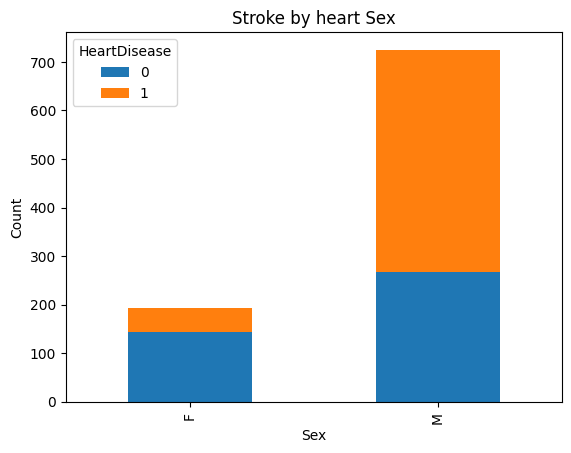

In [221]:
counts = data.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()

# totals = counts.sum(axis=1)
# percentages = counts.divide(totals, axis=0)*100

ax = counts.plot(kind='bar', stacked=True)
# ax.set_ylim([0,100])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Stroke by heart Sex')

Заметим, что среди женщин довольно мало тех, у кого проблемы с сердцем

Построим violin plot для каждого признака

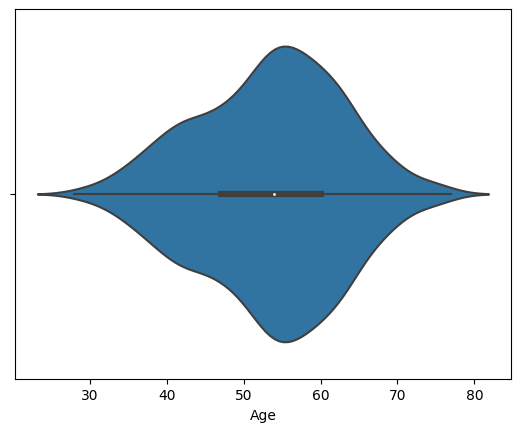

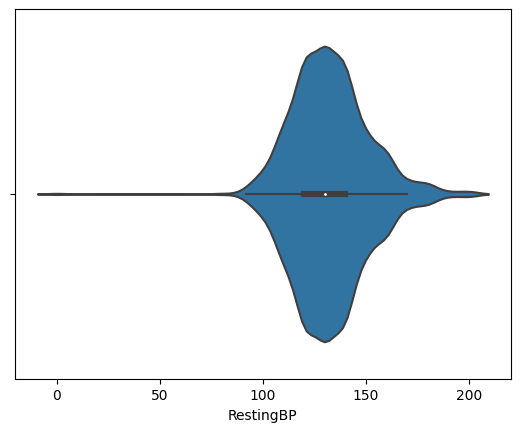

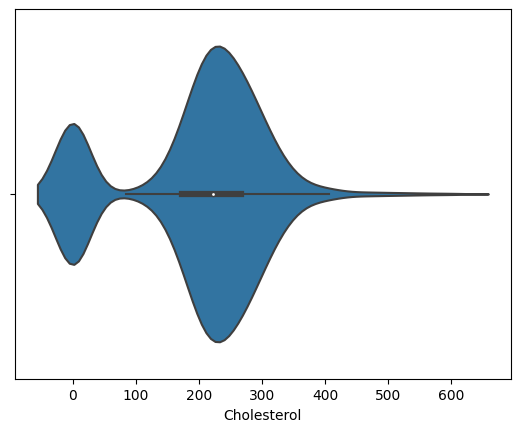

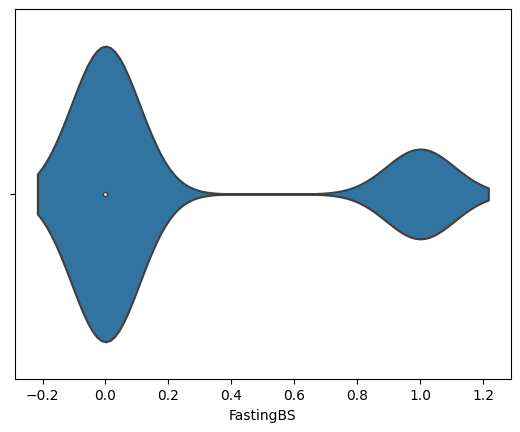

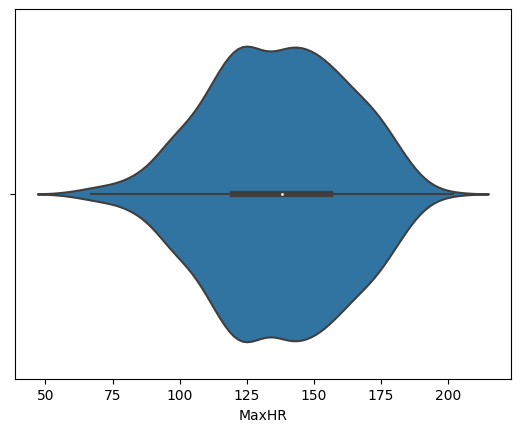

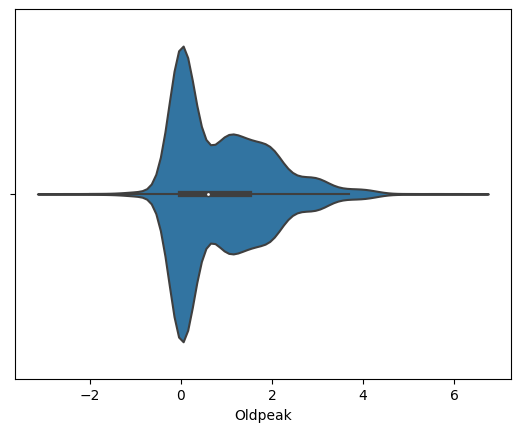

In [222]:
for col in NUM_COLUMNS:
    sns.violinplot(x=data[col])
    plt.show()


### Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

## Масштабирование

Посмотрим на распредление колонок, которые будем масштабировать. Промасштабируем. Убедимся, что распределение не изменилось. Закодируем все категориальные признаки

In [223]:
mms = MinMaxScaler()
le = LabelEncoder()
data_scaled = data.copy()

for col in NUM_COLUMNS:
    data_scaled[col] = mms.fit_transform(data[[col]])

for col in CAT_COLUMNS:
    data_scaled[col] = le.fit_transform(data[col])

data_scaled.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0


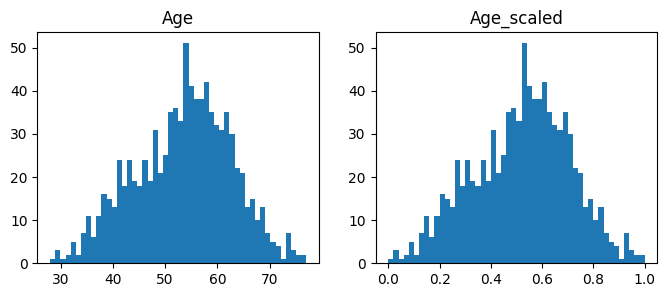

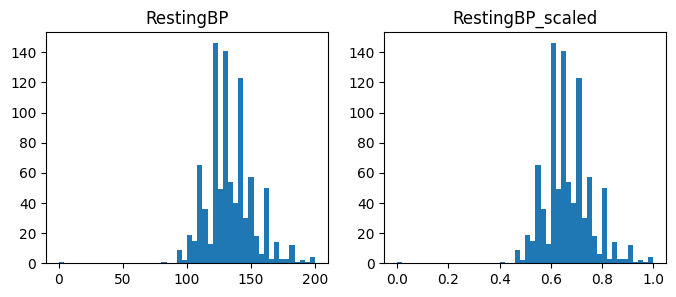

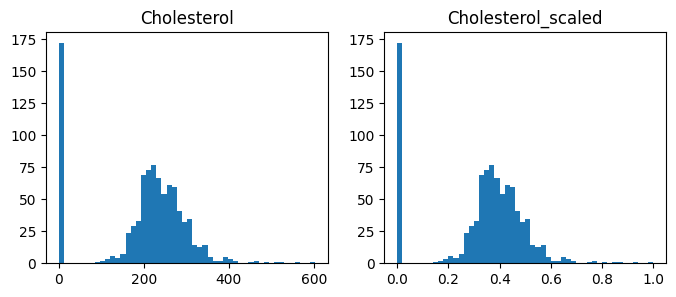

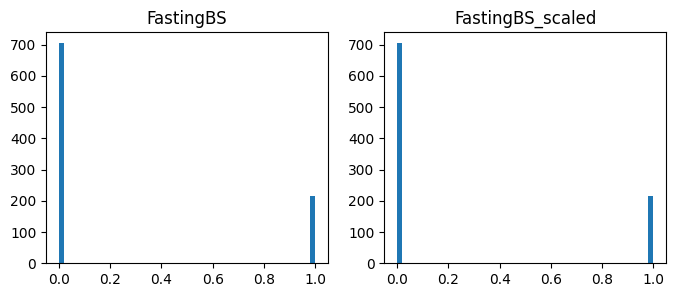

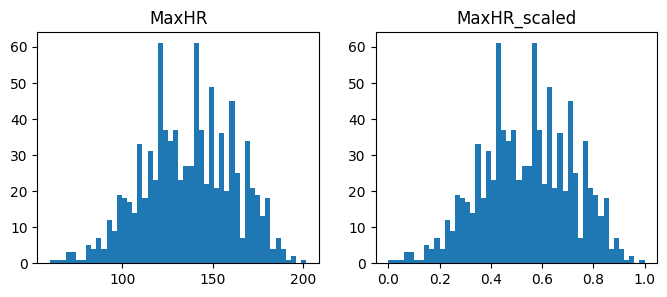

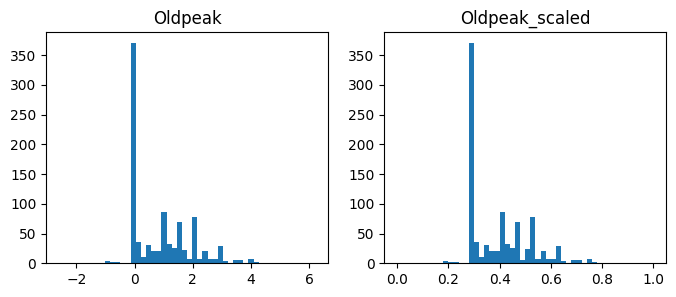

In [224]:
for col in NUM_COLUMNS:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data_scaled[col], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

**Масштабирование данных не повлияло на их распределение.**

In [225]:
data = data_scaled

### Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения.

Построим матрицу корреляции для набора данных.

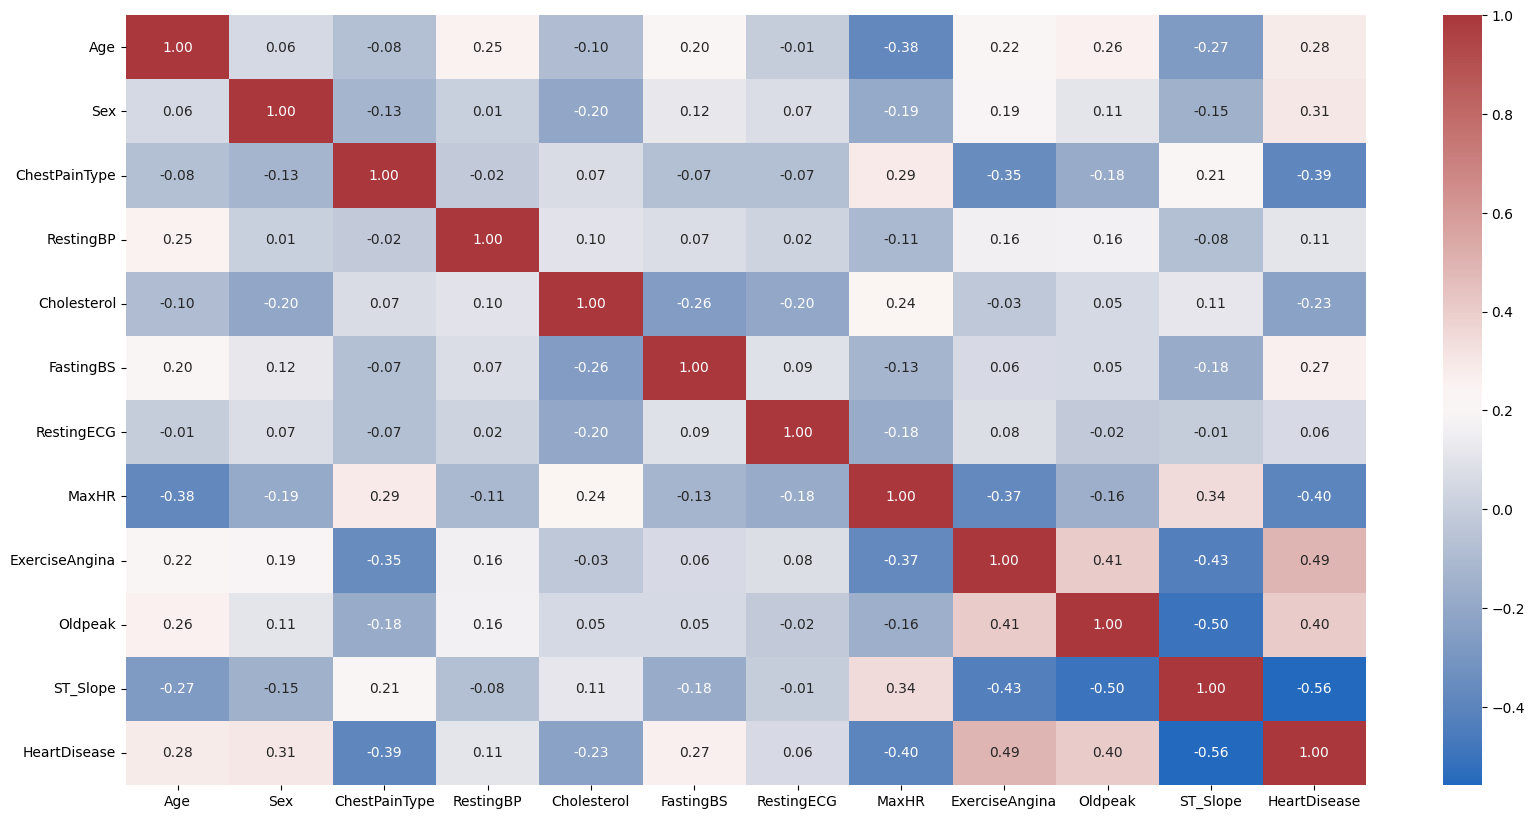

In [226]:
my_cmap=sns.color_palette('vlag', as_cmap=True)
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=my_cmap)
plt.show()

На основе корреляционной матрицы можно сделать следующие выводы:

* целевой признак HeartDisease больше всего коррелирует с наличием наклона сегента ST (0.56), стенохардии (0.49), депрессии (0.40).
* Нецелевых признаков, имеющих между собой особо сильную корреляцию, в наборе данных не наблюдается.
* столбец с электрокардиограммой имеет слишком низкую кореляцию с целевым признаком, удалим его
* столбец с кровяным давлением в состоянии покоя оставим, так как ранее мы выявили, что зависимости между ним и сердечой недостаточностью может существовать

In [227]:
data = data.drop(columns=['RestingECG'])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0.0,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0.0,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0.0,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0.0,0.436620,0,0.295455,2,0


### Выбор метрик для последующей оценки качества моделей.

Будем использовать метрики:
- Метрика balanced accuracy: Использоваться будет функция [balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)
- Метрика $F_1$-мера: метрика как среднее гармоническое precision и recall позволяет учитывать обе эти метрики одновременно. Использоваться будет функция [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- Метрика ROC AUC: площадь под графиком ROC-кривой позволяет оценить качество модели, учитывая True Positive Rate и False Positive Rate. Использоваться будет функция [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

### Выбор наиболее подходящих моделей для решения задачи классификации.

Будут использованы модели:
- Метод k ближайших соседей
- Логистическая регрессия
- Метод опорных векторов
- Случайный лес
- Градиентный бустинг

### Формирование обучающей и тестовой выборок на основе исходного набора данных.

Выделим из исходного набора данных обучающую и тестовую выборки.

In [228]:
X_data, y_data = data.drop(columns=[TARGET_KEY]), data[[TARGET_KEY]]
X_test, X_train, y_test, y_train = train_test_split(X_data, y_data, shuffle=True, stratify=y_data)

### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

Для создания моделей с параметрами, их обучения, сохранения предсказаний, вычисления и визулизации метрик был насписан класс ModelList.

In [229]:
class ModelList:
    def __init__(self, **models):
        self.__model_keys = list(models.keys())
        self.__model_classes = models
        self.__model_params = {key: {} for key in self.__model_keys}
        self.__metric_labels = []
        self.__metric_fns = {}
        self.__model_metrics = {key: {} for key in self.__model_keys}
        self.__models = {}
        self.__model_pred = {}
        self.X_test = None
        self.y_test = None
        self.X_train = None
        self.y_train = None

    def set_params(self, model_key: str, **params):
        try:
            self.__models[model_key]
            return
        except:
            self.__model_params[model_key] = params

    def set_metrics(self, **metrics):
        for key in metrics:
            self.__metric_fns[key] = metrics[key]
            self.__metric_labels += [key]

    def predict(self, model_key: str | None = None):
        if model_key:
            self.__model_pred[model_key] = self.__models[model_key].predict(self.X_test)
            return
        for key in self.__model_keys:
            self.__model_pred[key] = self.__models[key].predict(self.X_test)

    def fit(self, model_key: str | None = None):
        if model_key:
            self.__models[model_key].fit(self.X_train, self.y_train.to_numpy().flatten())
        for key in self.__model_keys:
            self.__models[key].fit(self.X_train, self.y_train.to_numpy().flatten())


    def initialize(self, model_key: str | None = None):
        if model_key:
            self.__models[model_key] = self.__model_classes[model_key](**self.__model_params[model_key])
            return
        for key in self.__model_keys:
            self.__models[key] = self.__model_classes[key](**self.__model_params[key])

    @property
    def keys(self):
        return self.__model_keys
    
    @property
    def predictions(self):
        return self.__model_pred

    @property
    def classes(self):
        return self.__model_classes
    
    @property
    def metrics(self):
        return self.__metric_labels

    def __getitem__(self, model_key: str):
        return self.__models[model_key]

    def __setitem__(self, model_key: str, value):
        self.__model_keys += [model_key]
        self.__model_classes[model_key] = value
        self.__model_params[model_key] = {}
        self.__model_metrics[model_key] = {}

    def __iter__(self):
        return iter(self.__models.items())
    
    def __draw_roc_curve(self, y_true, y_score, ax):
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc_value = roc_auc_score(y_true, y_score)
        lw = 2
        ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
        ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_xlim([0.0, 1.0])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic')
        ax.legend(loc="lower right")

    def get_model_metrics(self, model_key):
        y_pred_proba = self.__models[model_key].predict_proba(self.X_test)
        y_pred_proba = y_pred_proba[:,1]
    
        for metric_label in self.__metric_labels:
            self.__model_metrics[model_key][metric_label] = self.__metric_fns[metric_label](self.y_test, self.__model_pred[model_key])

        fig, ax = plt.subplots(ncols=2, figsize=(20,10))
        self.__draw_roc_curve(self.y_test, y_pred_proba, ax[0])
        ConfusionMatrixDisplay.from_predictions(y_test, self.__model_pred[model_key], ax=ax[1], cmap=sns.color_palette("YlOrBr", as_cmap=True), normalize='true')
        fig.suptitle(model_key)
        plt.show()

    def plot_metrics(self, metric_label):
        metric_values = sorted([(model_key, self.__model_metrics[model_key][metric_label]) for model_key in self.__model_keys], key=lambda x: x[1])
        metric_models = [model_name for model_name, _ in metric_values]
        metric_scores = [model_score for _, model_score in metric_values]
        _, ax = plt.subplots(figsize=(20, 10))
        ax.set_xlim([0, 1])
        pos = np.arange(len(self.__model_keys))
        ax.barh(pos, metric_scores,
                    align='center',
                    height=0.5, 
                    tick_label=metric_models)
        ax.set_title(metric_label)
        for x, y in zip(pos, metric_scores):
            plt.text(0.01, x-0.05, str(round(y,3)), color='white').set_bbox({
                  'facecolor': 'black'
            })
        plt.show()

Создание и обучение моделей без параметров, получение предсказаний.

In [230]:
model_list = ModelList(KNN=KNeighborsClassifier, LR=LogisticRegression, SVC=SVC, RF=RandomForestClassifier, GB=GradientBoostingClassifier)
model_list.X_train = X_train
model_list.y_train = y_train
model_list.X_test = X_test
model_list.y_test = y_test
model_list.set_params('SVC', probability=True)
model_list.initialize()
model_list.fit()
model_list.predict()

Вычисление метрик для каждой модели, отрисовка ROC-кривых и матриц ошибок. 

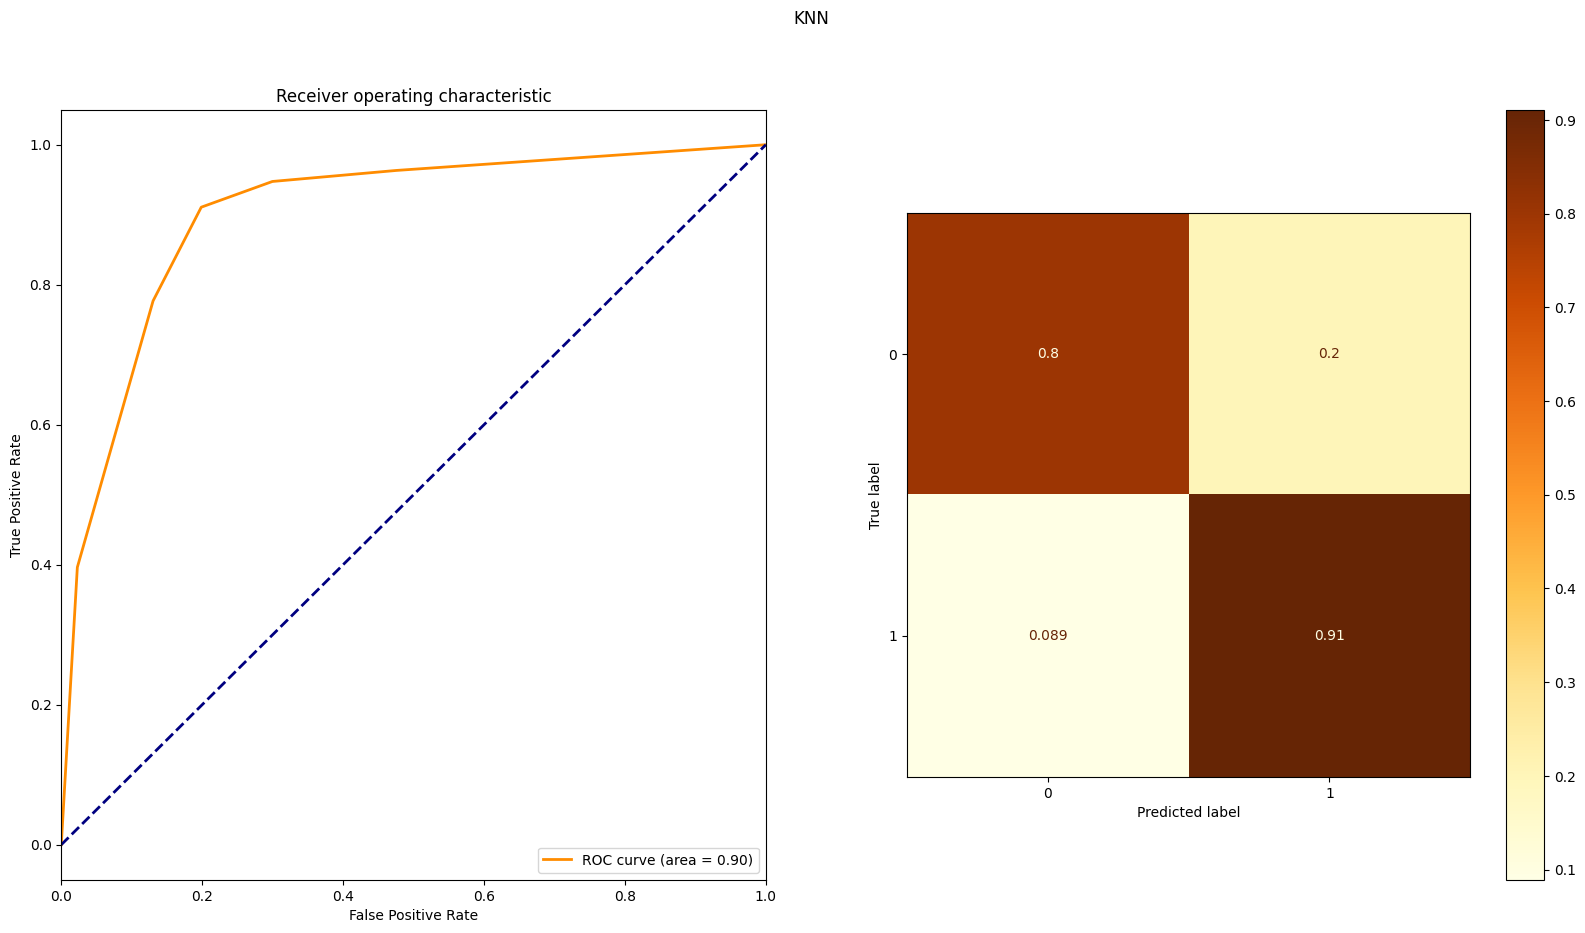

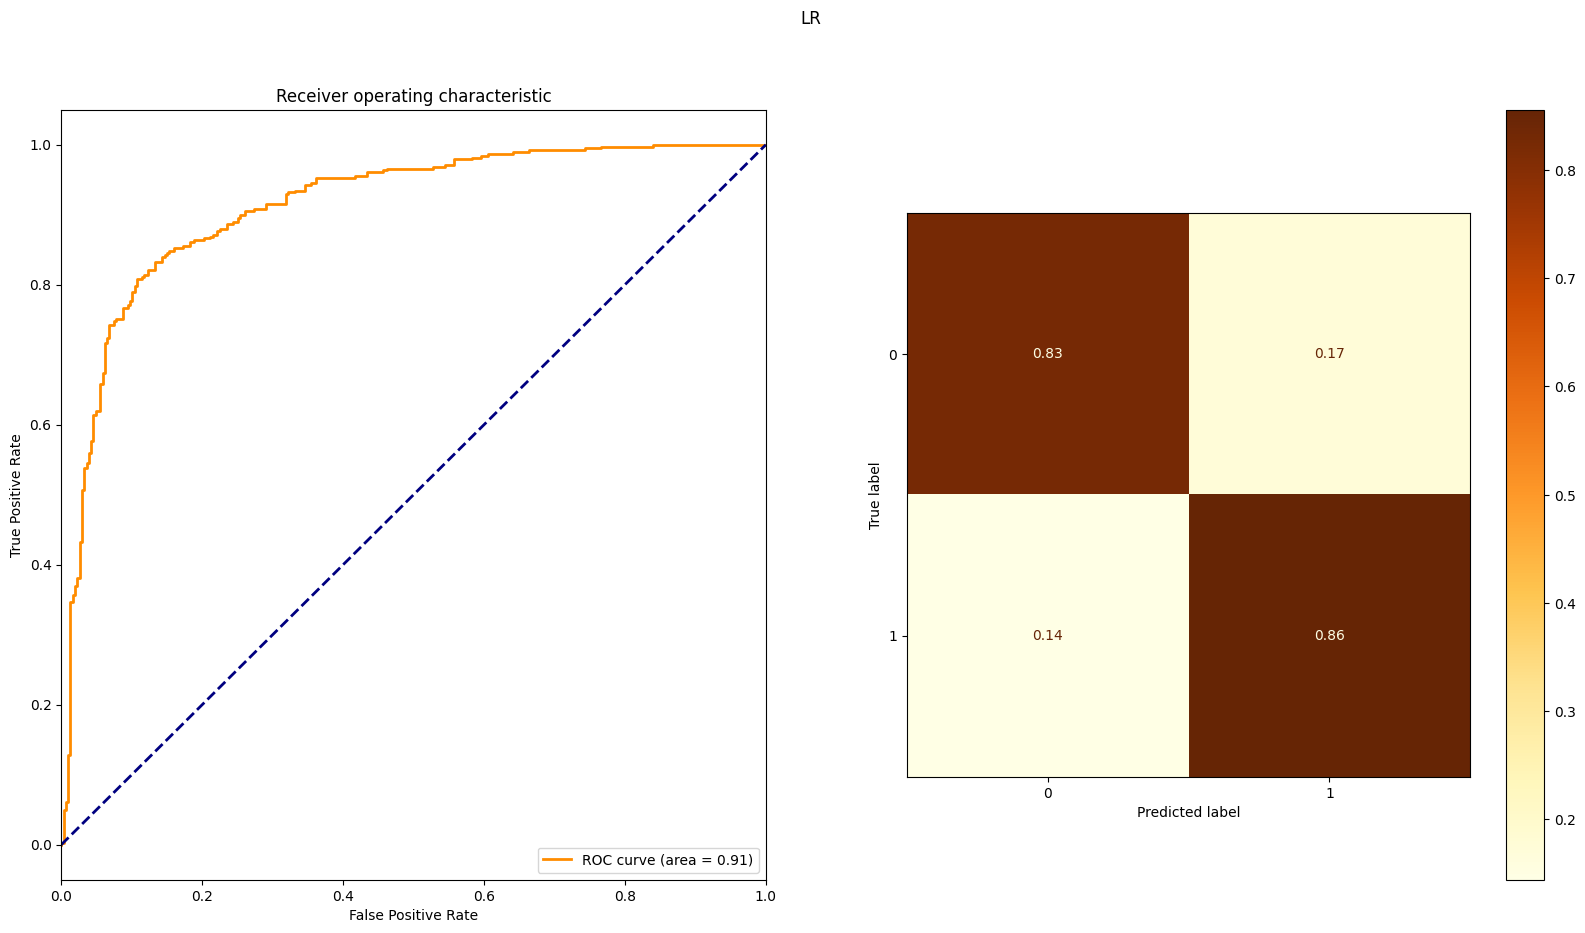

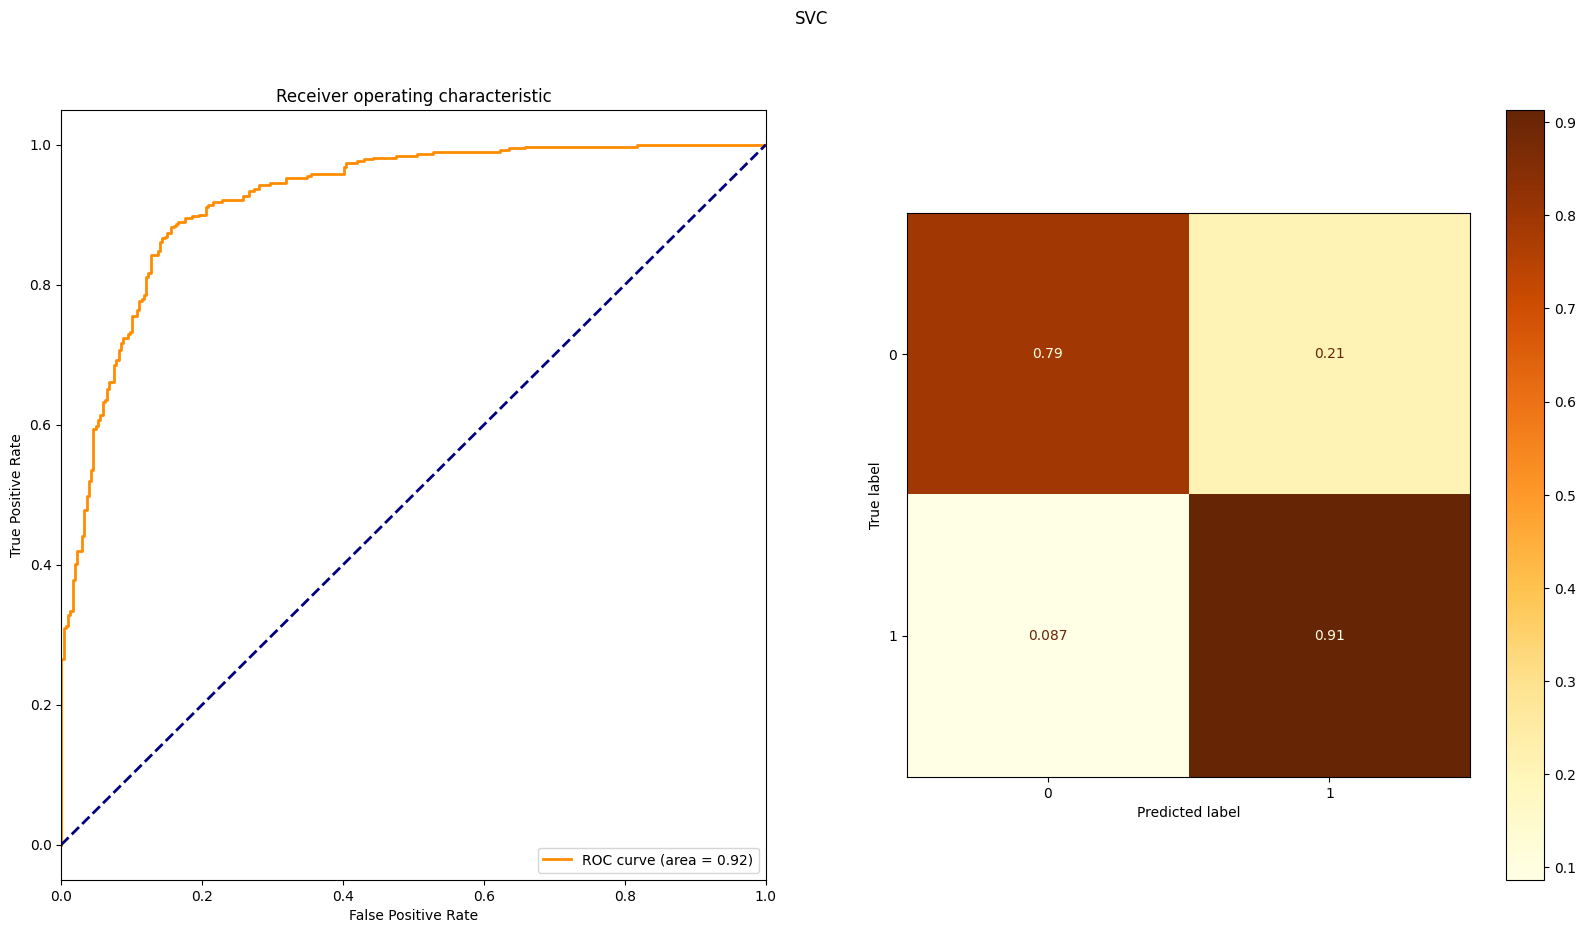

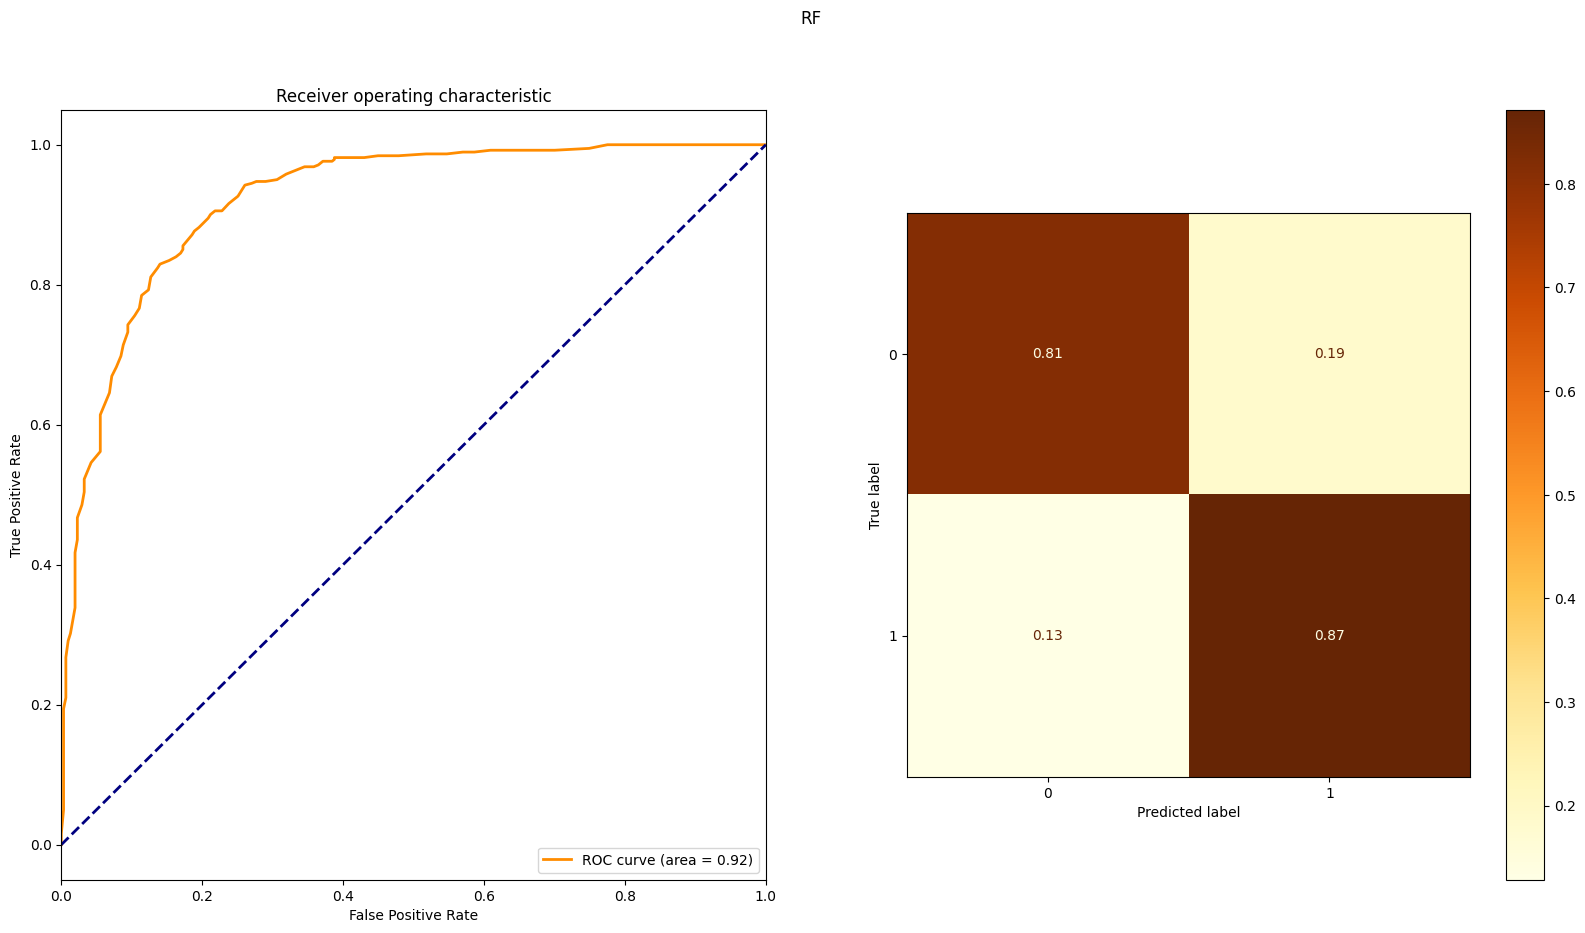

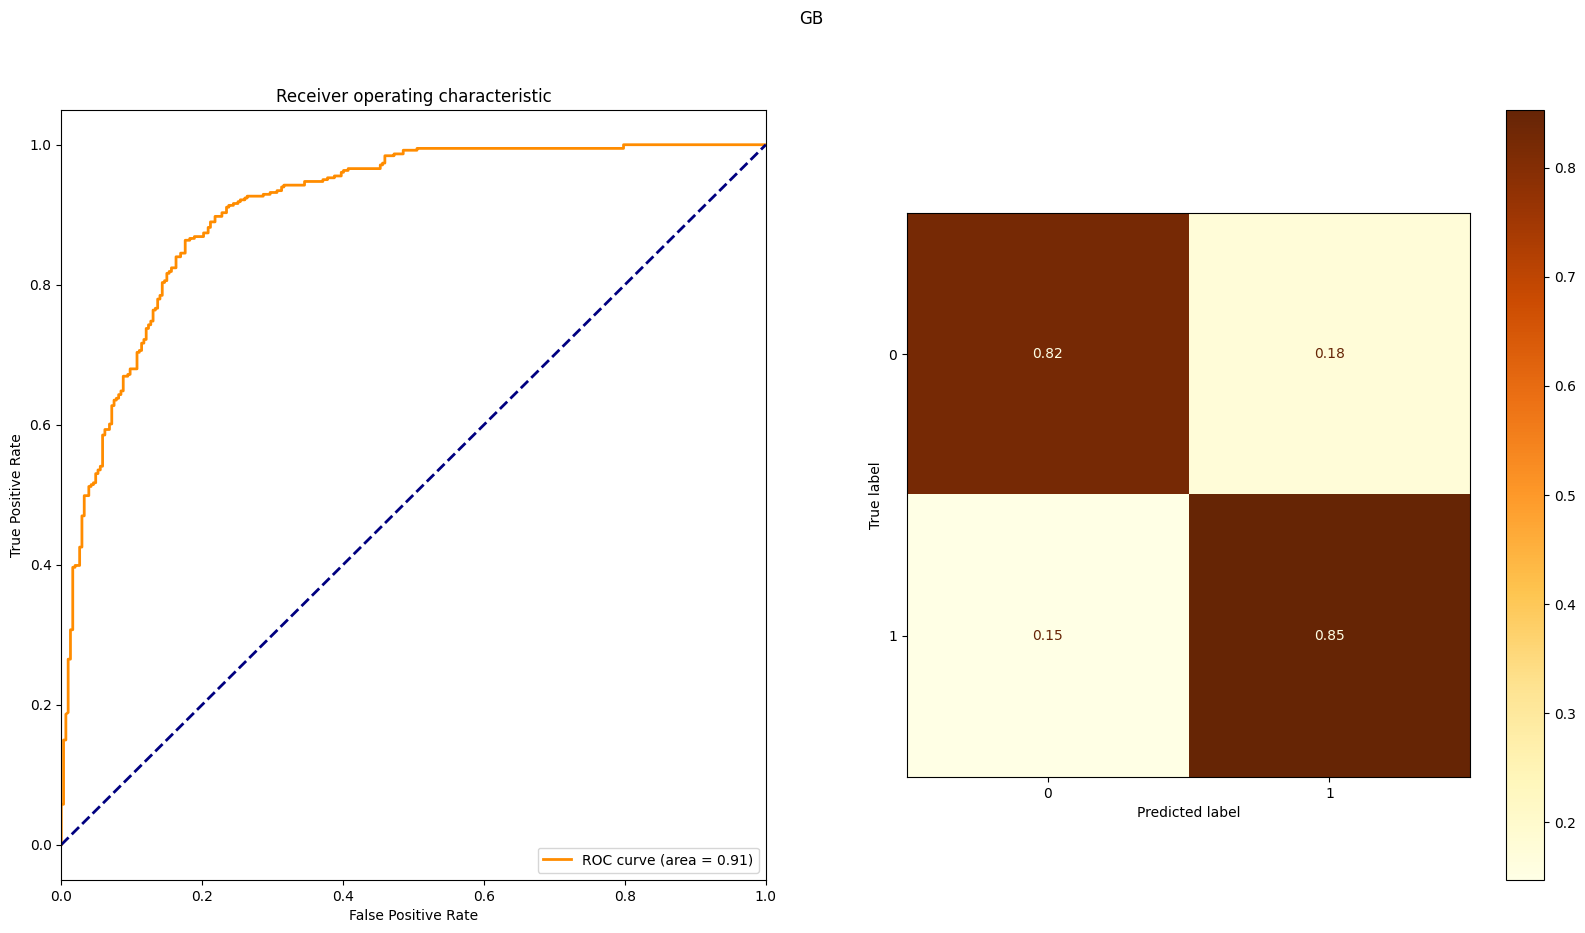

In [231]:
model_list.set_metrics(balanced_accuracy=balanced_accuracy_score, f1=f1_score, roc_auc=roc_auc_score)
for key in model_list.keys:
    model_list.get_model_metrics(key)

### Подбор гиперпараметров для выбранных моделей с использованием RandomizedSearchCV.

Создаем новую модель метода ближайших соседей, подбираем лучшие параметры.

In [232]:
model_list['KNN_OPT'] = KNeighborsClassifier

n_range = list(range(1, 50))
weights_range = ['uniform', 'distance']
p_range = [1, 2]
param_grid = dict(n_neighbors=n_range, weights=weights_range, p=p_range)

rs = RandomizedSearchCV(model_list.classes['KNN_OPT'](), param_grid, scoring='balanced_accuracy')
random_search=rs.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

best_n = random_search.best_params_['n_neighbors']
best_weights = random_search.best_params_['weights']
best_p = random_search.best_params_['p']
best_n, best_weights, best_p

(15, 'distance', 2)

Устанавливаем модели найденные лучшие параметры, вычисляем значения метрик, выводим графики для сравнения с baseline-моделью.

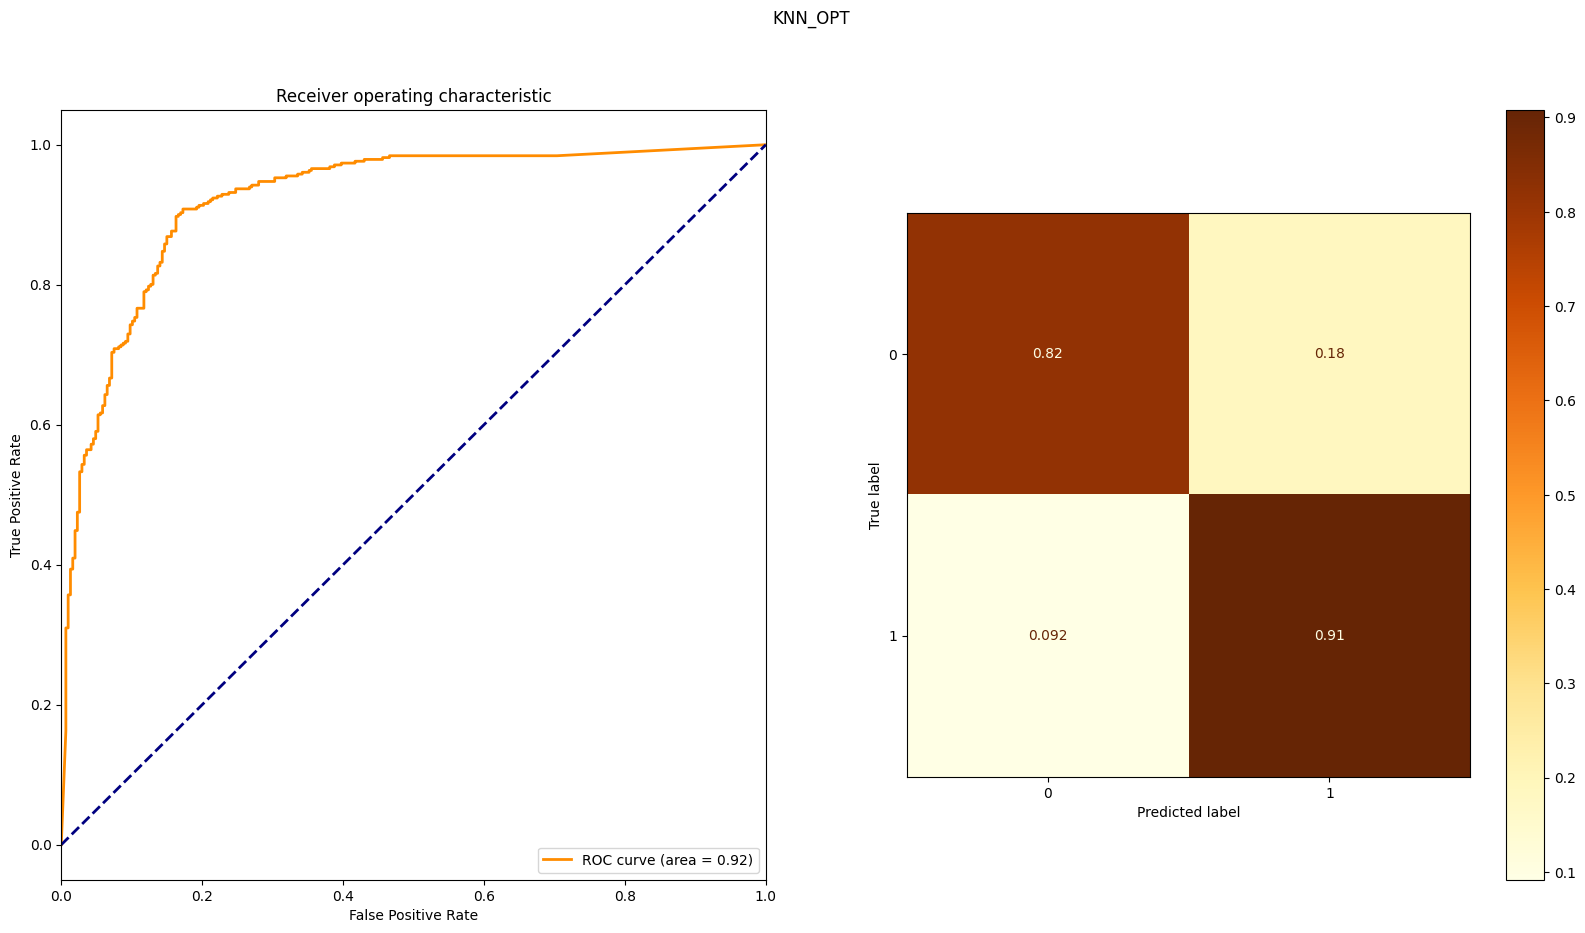

In [233]:
model_list.set_params('KNN_OPT', n_neighbors=best_n, weights=best_weights, p=best_p)
model_list.initialize(model_key='KNN_OPT')
model_list.fit(model_key='KNN_OPT')
model_list.predict(model_key='KNN_OPT')

model_list.get_model_metrics('KNN_OPT')

Создаем новую модель логистической регрессии, подбираем лучшие параметры.

In [234]:
model_list['LR_OPT'] = LogisticRegression

C_range = [float(10**(power / 100)) for power in range(-200, 201)]
solver_range = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
class_weight_range = [{0: i, 1: 1000 - i} for i in range(1, 1000)]
param_grid = dict(C=C_range, solver=solver_range, class_weight=class_weight_range)

rs = RandomizedSearchCV(model_list.classes['LR_OPT'](), param_grid, scoring='balanced_accuracy')
random_search=rs.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

best_C = random_search.best_params_['C']
best_solver = random_search.best_params_['solver']
best_class_weight = random_search.best_params_['class_weight']
best_C, best_solver, best_class_weight

c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\miss-\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

(0.831763771102671, 'lbfgs', {0: 580, 1: 420})

Устанавливаем модели найденные лучшие параметры, вычисляем значения метрик, выводим графики для сравнения с baseline-моделью.

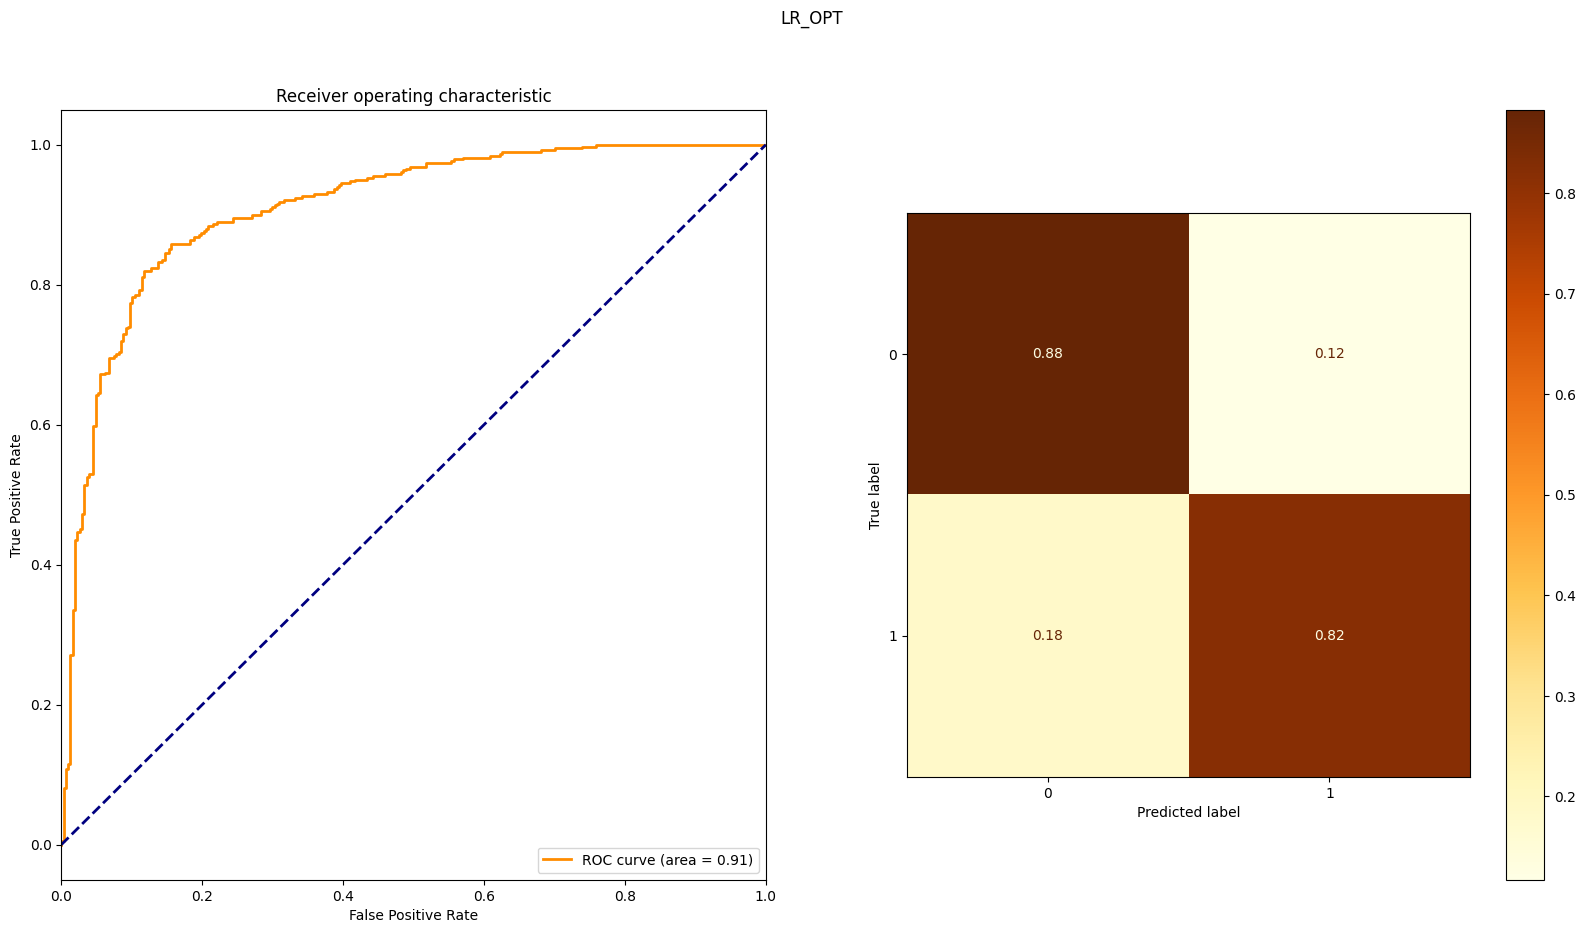

In [235]:
model_list.set_params('LR_OPT', C=best_C, solver=best_solver, class_weight=best_class_weight)
model_list.initialize(model_key='LR_OPT')
model_list.fit(model_key='LR_OPT')
model_list.predict(model_key='LR_OPT')

model_list.get_model_metrics('LR_OPT')

Создаем новую модель метода опорных векторов, подбираем лучшие параметры.

In [236]:
model_list['SVC_OPT'] = SVC

C_range = [float(10**(power / 100)) for power in range(-200, 201)]
kernel_range = ['linear', 'poly', 'rbf', 'sigmoid']
class_weight_range = [{0: i, 1: 1000 - i} for i in range(1, 1000)]
param_grid = dict(C=C_range, kernel=kernel_range, class_weight=class_weight_range)

rs = RandomizedSearchCV(model_list.classes['SVC_OPT'](), param_grid, scoring='balanced_accuracy')
random_search=rs.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

best_C = random_search.best_params_['C']
best_kernel = random_search.best_params_['kernel']
best_class_weight = random_search.best_params_['class_weight']
best_C, best_kernel, best_class_weight

(0.0199526231496888, 'rbf', {0: 366, 1: 634})

Устанавливаем модели найденные лучшие параметры, вычисляем значения метрик, выводим графики для сравнения с baseline-моделью.

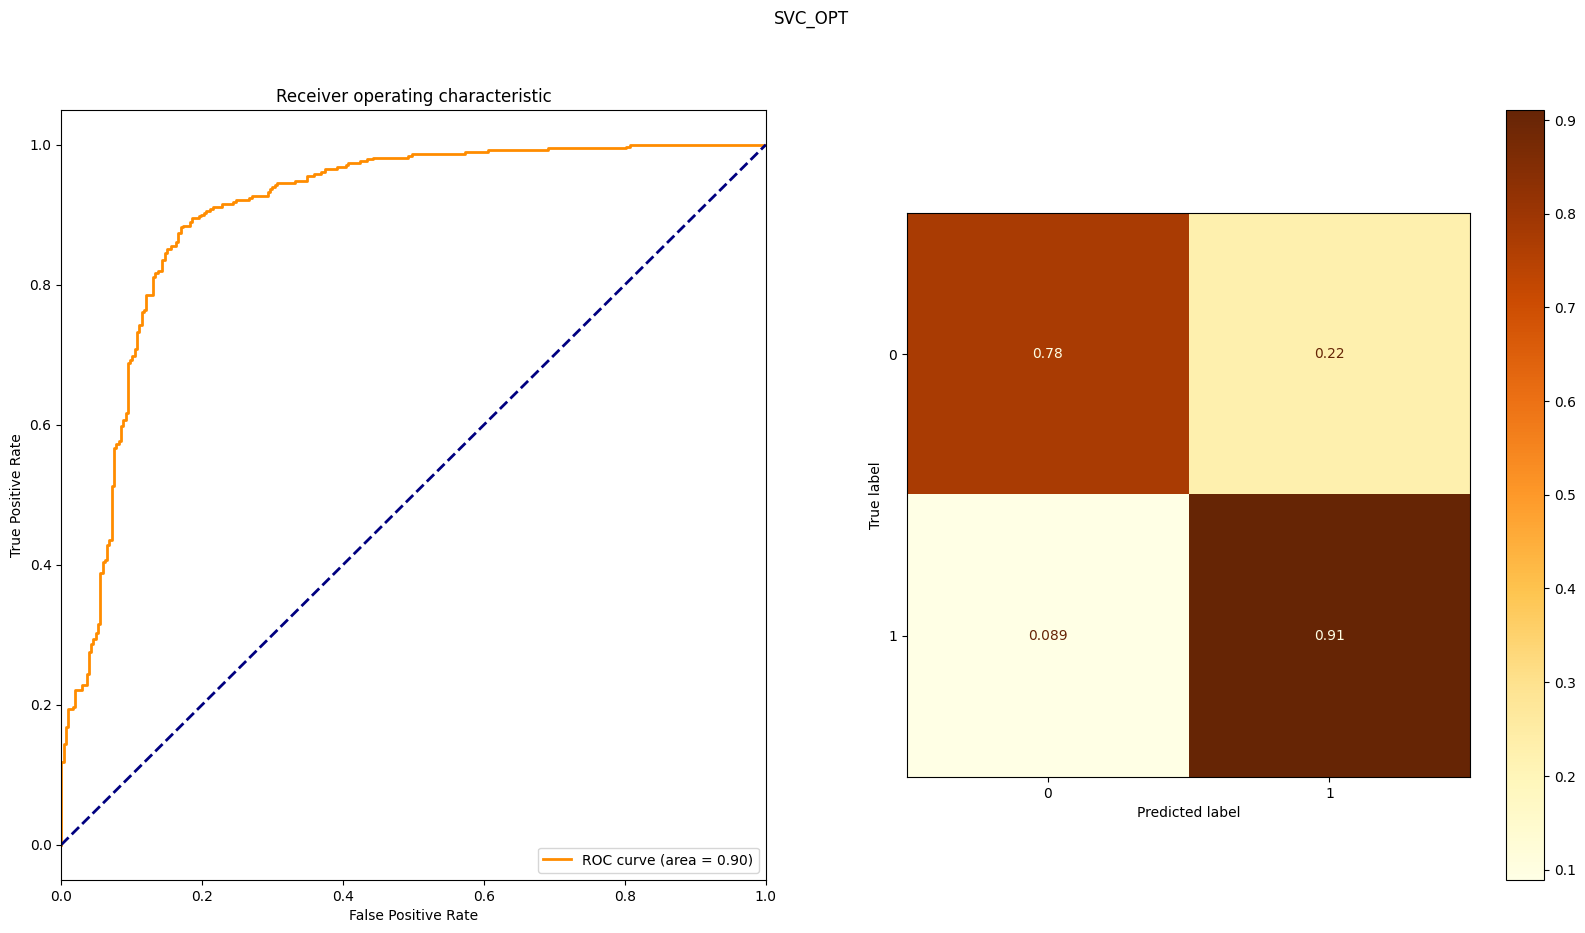

In [237]:
model_list.set_params('SVC_OPT', C=best_C, kernel=best_kernel, class_weight=best_class_weight, probability=True)
model_list.initialize(model_key='SVC_OPT')
model_list.fit(model_key='SVC_OPT')
model_list.predict(model_key='SVC_OPT')

model_list.get_model_metrics('SVC_OPT')

Создаем новую модель случайного леса, подбираем лучшие параметры.

In [238]:
model_list['RF_OPT'] = RandomForestClassifier

n_range = [int(10**(i / 10)) for i in range(0, 31)]
features_range = [None, 'sqrt', 'log2']
criterion_range = ['gini', 'entropy', 'log_loss']
class_weight_range = [{0: i, 1: 1000 - i} for i in range(1, 1000)]
param_grid = dict(n_estimators=n_range, max_features=features_range, criterion=criterion_range, class_weight=class_weight_range)

rs = RandomizedSearchCV(model_list.classes['RF_OPT'](), param_grid, scoring='balanced_accuracy')
random_search=rs.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

best_n = random_search.best_params_['n_estimators']
best_features = random_search.best_params_['max_features']
best_criterion = random_search.best_params_['criterion']
best_class_weight = random_search.best_params_['class_weight']
best_n, best_features, best_criterion, best_class_weight

(501, 'sqrt', 'entropy', {0: 815, 1: 185})

Устанавливаем модели найденные лучшие параметры, вычисляем значения метрик, выводим графики для сравнения с baseline-моделью.

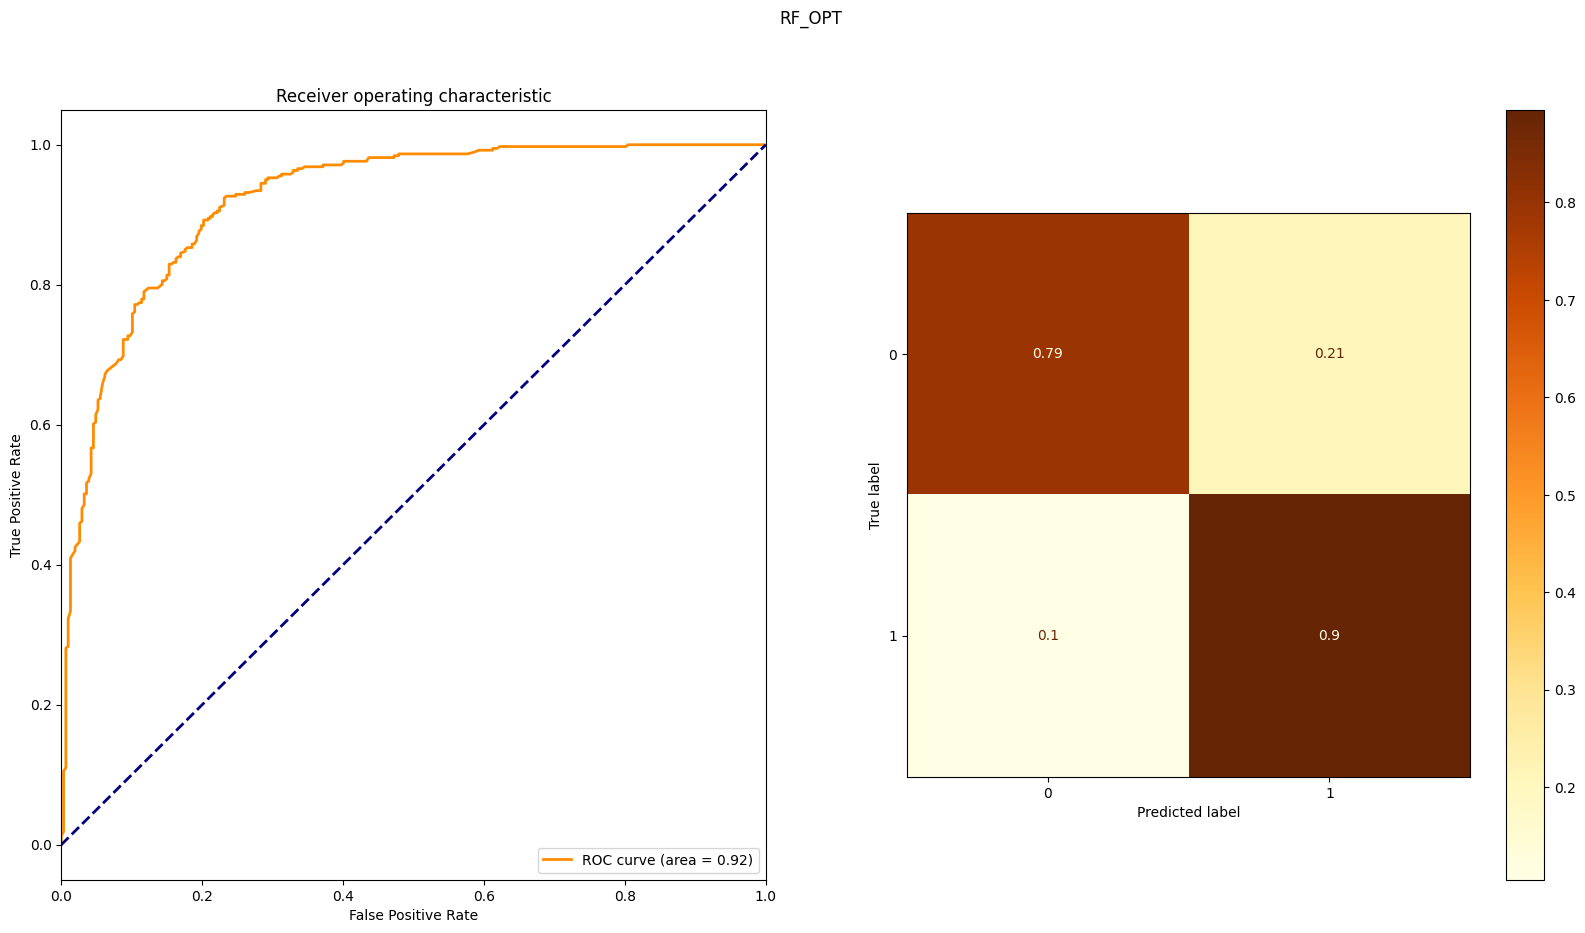

In [239]:
model_list.set_params('RF_OPT', n_estimators=best_n, max_features=best_features, criterion=best_criterion, class_weight=best_class_weight)
model_list.initialize(model_key='RF_OPT')
model_list.fit(model_key='RF_OPT')
model_list.predict(model_key='RF_OPT')

model_list.get_model_metrics('RF_OPT')

Создаем новую модель градиентного бустинга, подбираем лучшие параметры.

In [240]:
model_list['GB_OPT'] = GradientBoostingClassifier

loss_range = ['log_loss', 'exponential']
rate_range = [float(10**(power / 100)) for power in range(-200, 201)]
n_range = [int(10**(i / 10)) for i in range(0, 31)]
criterion_range = ['friedman_mse', 'squared_error']
param_grid = dict(loss=loss_range, learning_rate=rate_range, n_estimators=n_range, criterion=criterion_range)

rs = RandomizedSearchCV(model_list.classes['GB_OPT'](), param_grid, scoring='balanced_accuracy')
random_search=rs.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

best_loss = random_search.best_params_['loss']
best_rate = random_search.best_params_['learning_rate']
best_n = random_search.best_params_['n_estimators']
best_criterion = random_search.best_params_['criterion']
best_loss, best_rate, best_n, best_criterion

('exponential', 0.013803842646028845, 25, 'friedman_mse')

Устанавливаем модели найденные лучшие параметры, вычисляем значения метрик, выводим графики для сравнения с baseline-моделью.

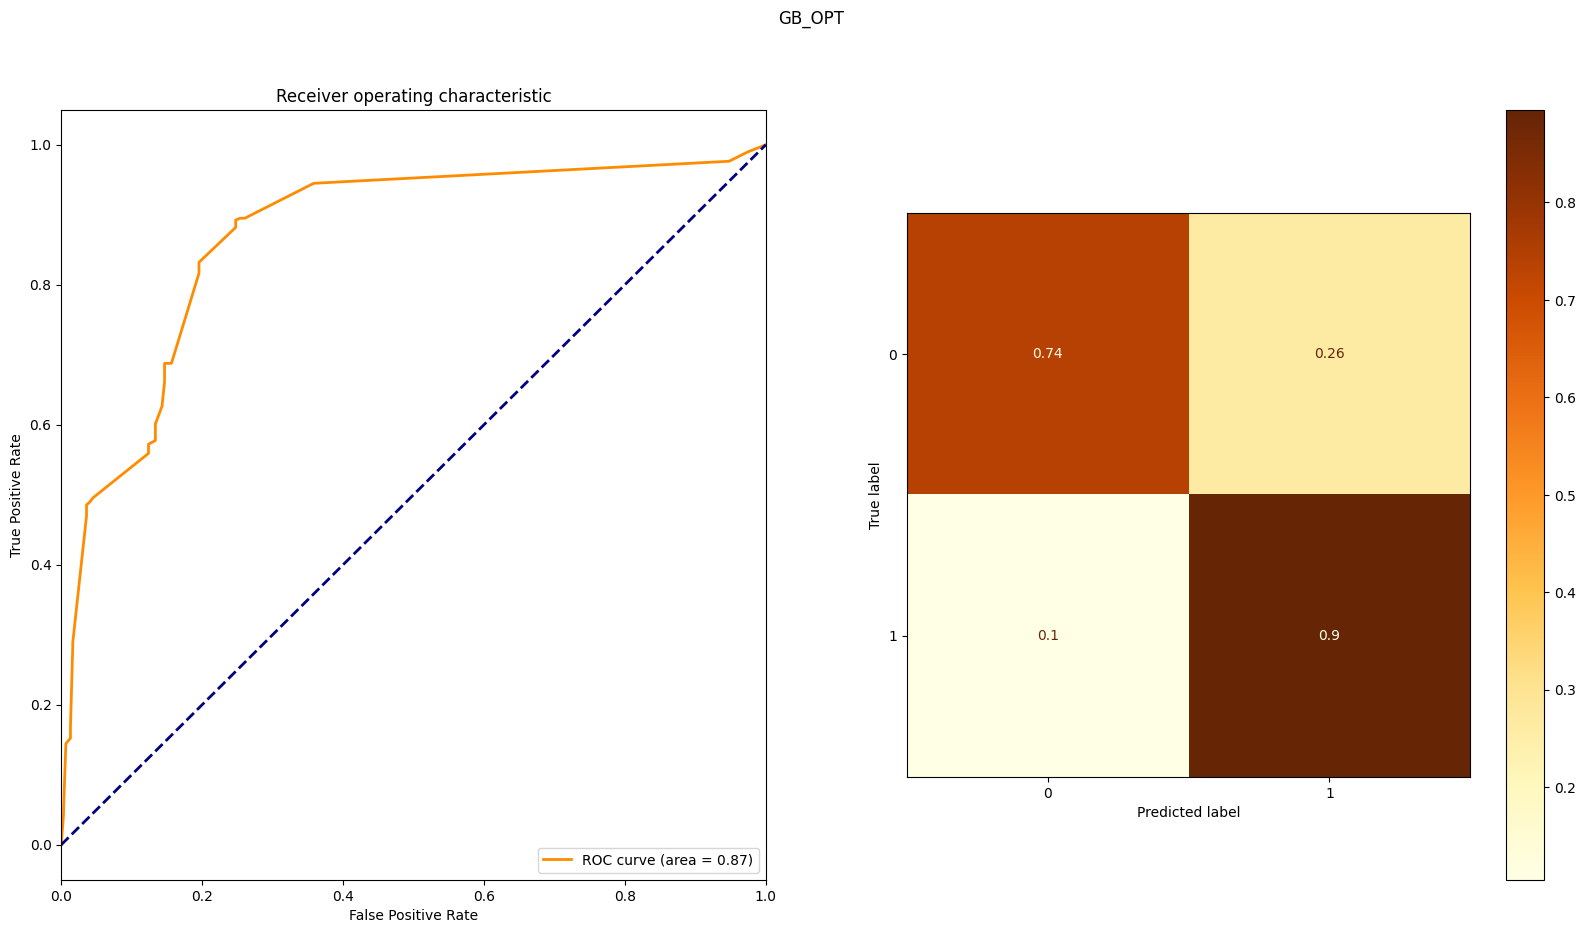

In [241]:
model_list.set_params('GB_OPT', loss=best_loss, learning_rate=best_rate, n_estimators=best_n, criterion=best_criterion)
model_list.initialize(model_key='GB_OPT')
model_list.fit(model_key='GB_OPT')
model_list.predict(model_key='GB_OPT')

model_list.get_model_metrics('GB_OPT')

### Формирование выводов о качестве построенных моделей на основе выбранных метрик.

Выведем значения каждой метрики для всех моделей.

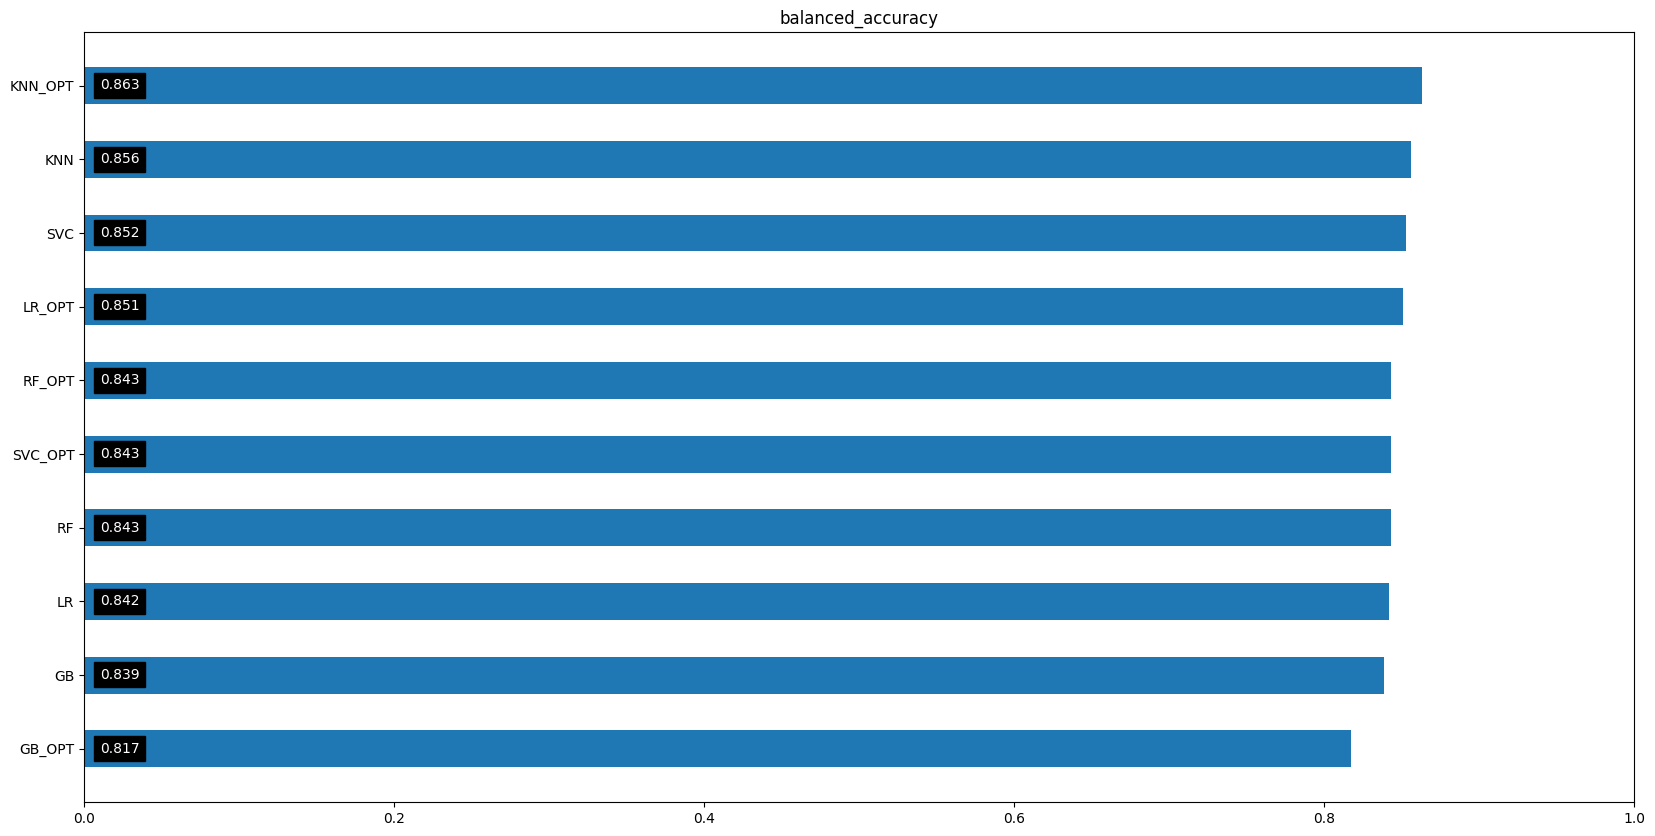

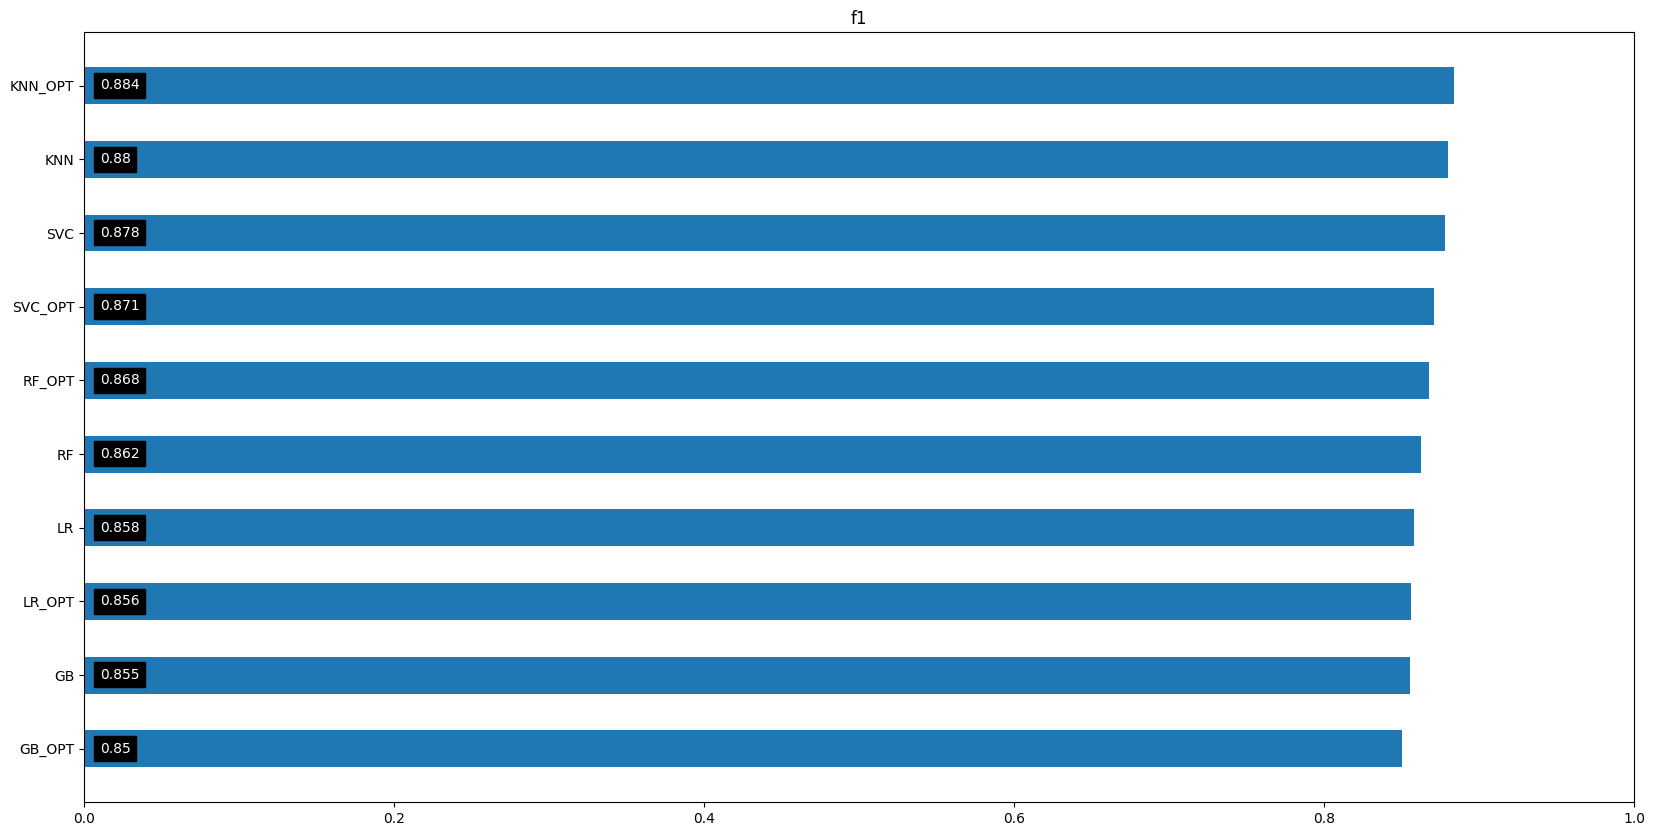

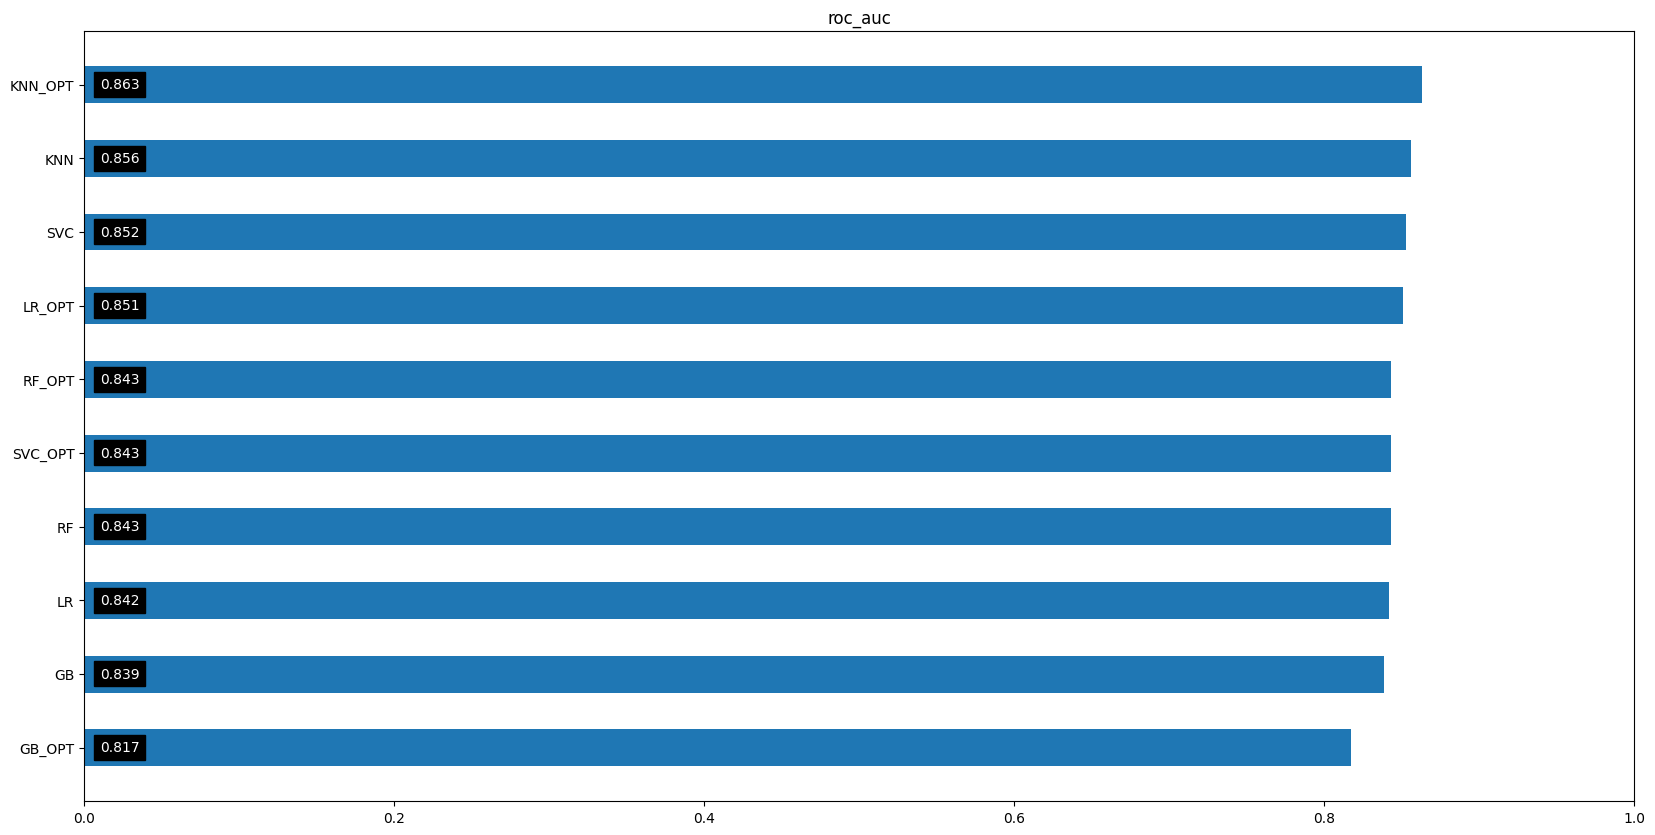

In [242]:
for metric_label in model_list.metrics:
    model_list.plot_metrics(metric_label)

**Выводы:**
- Оптимизация **метода ближайших соседей** привела к несколько *лучшим* результатам по всем метрикам
- Оптимизация **логистической регрессии** привела к несколько *лучшим* результатам по большинству метрикам
- Оптимизация **метода опорных векторов** привела к намного *худшим* результатам по всем метрикам
- Оптимизация **случайного леса привела** к несколько *лучшим* результатам по всем метрикам
- Оптимизация **градиентного бустинга** привела к несколько *худшим* результатам по всем метрикам
- Лучшие результаты были показаны методом **ближайших соседей** 